# Junioraufgabe: Quadratisch Praktisch Grün

### Team-ID: 12345

### Team-Name: MyTeam

### Bearbeiter/-innen dieser Aufgabe: Lena Müller, Malte Riedberg

Datum: 23.04.2025

### Lösungsidee

Die Anzahl der Teilgrundstücke muss mindestens so groß sein wie die Zahl *anz* der Interessenten. Sie darf aber nicht größer sein als 10% mehr, diesen Wert bezeichnen wir mit *maxanz*. Die vertikale Anzahl der Teilungen bezeichnen wir mit x, die horizontale Anzahl der Teilungen mit y.  x und y müssen beide zwischen 1 und *maxanz* liegen und x*y darf nicht größer als *maxanz* sein.

Wir berechnen für jede gültige Kombination von x und y berechnen wir die Breite und Höhe eines Teilgrundstücks. Daraus können wir die *Quadratheit* des Teilgrundstücks berechnen. Ein Grundstück betrachten wir als ums so quadratischer, je näher das Verhältnis der kürzeren zur längeren Seite bei 1 ist. 

Unter allen gültigen Kombinationen von x und y wählen wir für die Lösung die Werte, bei denen die Quadratheit der Teilgrundstücke der 1 am nächsten kommt.

<div style="page-break-after: always;"></div>

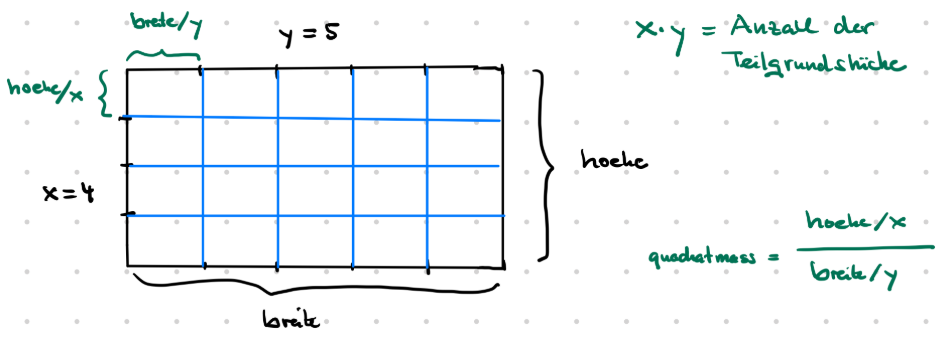

In [4]:
from IPython.display import Image, display              # damit das Bild bei print erscheint
display(Image(filename='aufteilung.png', width=700))




### Umsetzung

Die Lösungsidee wird in ein Programm der Sprache Python umgesetzt. Zunächst lesen wir die Daten der Eingabe ein.

In [17]:
# Eingabedaten lesen
eingabe = 'garten0.txt'
print(f'Beispieldatei: {eingabe}')
f = open('beispieldaten/'+eingabe)
anz = int(f.readline())
hoehe = int(f.readline())
breite = int(f.readline())
f.close()
print(f'Anzahl Interessenten = {anz}')
print(f'Höhe = {hoehe}, Breite = {breite}')

Beispieldatei: garten0.txt
Anzahl Interessenten = 23
Höhe = 42, Breite = 66


Wir berechnen, wieviele Teilgrundstücke maximal erzeugt werden dürfen.

In [4]:
maxanz = int(anz*1.1)
print(f'Maximale Anzahl von Grundstücken: {maxanz}') 

Maximale Anzahl von Grundstücken: 25


Die Funktion *quadratmass* berechnet uns das Verhältnis der kürzeren zur längeren Seite. Je größer der Wert ist, desto quadratischer ist das Rechteck. Bei einem Quadrat ist der Wert 1.

In [5]:
def quadratmass(hoehe, breite):
    if hoehe > breite: 
        return breite/hoehe
    else:
        return hoehe/breite

Wir probieren alle möglichen vertikalen und horizontalen Teilungen aus.

In [8]:
best = 0                                # die beste Quadratheit ist zu Beginn 0
for x in range(1,maxanz+1):             # Für alle vertikale Teilungen
    for y in range(1,maxanz+1):         # Für alle horizontalen Teilungen
        if x*y > maxanz: break          # Falls y schon zu groß, verlassen wir die innere Schleife
        if anz <= x*y:                  # Falls mindestens anz Teilgrundstück erzeugt werden
            h = hoehe/x                 # die Höhe eines Teilgrundstücks
            b = breite/y                # die Breite eines Teilgrundstücks
            q = quadratmass(b,h)        # die Quadratheit eines Teilgrundstücks
            if q > best:                # falls bessere Quadratheit gefunden
                best = q                # speichere diesen besten Wert
                best_x = x              # speichere das beste x
                best_y = y              # speichere das beste y
print('Beste Aufteilung:')
print(f'{best_x} Zeilen mit Hoehe {hoehe/best_x:.2f} und {best_y} Spalten mit Breite {breite/best_y:.2f}')

Beste Aufteilung:
4 Zeilen mit Hoehe 10.50 und 6 Spalten mit Breite 11.00



<div style="page-break-after: always;"></div>

### Beispiele

Unser Programm liefert für die Beispieldaten folgende Ergebnisse:

```
Beispieldatei: garten0.txt
Anzahl Interessenten: 23
Höhe: 42, Breite: 66
Maximale Anzahl von Grundstücken: 25
Beste Aufteilung:
4 Zeilen mit Hoehe 10.50 und 6 Spalten mit Breite 11.00

Beispieldatei: garten1.txt
Anzahl Interessenten: 19
Höhe: 15, Breite: 12
Maximale Anzahl von Grundstücken: 20
Beste Aufteilung:
5 Zeilen mit Hoehe 3.00 und 4 Spalten mit Breite 3.00

Beispieldatei: garten2.txt
Anzahl Interessenten: 36
Höhe: 55, Breite: 77
Maximale Anzahl von Grundstücken: 39
Beste Aufteilung:
6 Zeilen mit Hoehe 9.17 und 6 Spalten mit Breite 12.83

Beispieldatei: garten3.txt
Anzahl Interessenten: 101
Höhe: 15, Breite: 15
Maximale Anzahl von Grundstücken: 111
Beste Aufteilung:
10 Zeilen mit Hoehe 1.50 und 11 Spalten mit Breite 1.36

Beispieldatei: garten4.txt
Anzahl Interessenten: 1200
Höhe: 37, Breite: 2000
Maximale Anzahl von Grundstücken: 1320
Beste Aufteilung:
5 Zeilen mit Hoehe 7.40 und 264 Spalten mit Breite 7.58

Beispieldatei: garten5.txt
Anzahl Interessenten: 35000
Höhe: 365, Breite: 937
Maximale Anzahl von Grundstücken: 38500
Beste Aufteilung:
120 Zeilen mit Hoehe 3.04 und 308 Spalten mit Breite 3.04
```

<div style="page-break-after: always;"></div>

### Quellcode

In [ ]:
def quadratmass(hoehe, breite):
    if hoehe > breite: 
        return breite/hoehe
    else:
        return hoehe/breite

# Eingabedaten lesen
eingabe = 'garten0.txt'
print(f'Beispieldatei: {eingabe}')
f = open('beispieldaten/'+eingabe)
anz = int(f.readline())
hoehe = int(f.readline())
breite = int(f.readline())
f.close()
print(f'Anzahl Interessenten: {anz}')
print(f'Höhe: {hoehe}, Breite: {breite}')

maxanz = int(anz*1.1)
print(f'Maximale Anzahl von Grundstücken: {maxanz}') 
best = 0                                # die beste Quadratheit ist zu Beginn 0
for x in range(1,maxanz+1):             # Für alle vertikale Teilungen
    for y in range(1,maxanz+1):         # Für alle horizontalen Teilungen
        if x*y > maxanz: break          # Falls y schon zu groß, verlassen wir die innere Schleife
        if anz <= x*y:                  # Falls mindestens anz Teilgrundstück erzeugt werden
            h = hoehe/x                 # die Höhe eines Teilgrundstücks
            b = breite/y                # die Breite eines Teilgrundstücks
            q = quadratmass(b,h)        # die Quadratheit eines Teilgrundstücks
            if q > best:                # falls bessere Quadratheit gefunden
                best = q                # speichere diesen besten Wert
                best_x = x              # speichere das beste x
                best_y = y              # speichere das beste y
print('Beste Aufteilung:')
print(f'{best_x} Zeilen mit Hoehe {hoehe/best_x:.2f} und {best_y} Spalten mit Breite {breite/best_y:.2f}')
 